In [1]:
import numpy as np 
import pandas as pd 
import nltk
import string as s
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud

from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics  import f1_score,accuracy_score
from sklearn.metrics import  confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
train_data=pd.read_csv("C:/Users/Anukriti/Downloads/train.csv",header=0,names=['classid','title','desc'])
test_data=pd.read_csv("C:/Users/Anukriti/Downloads/test.csv",header=0,names=['classid','title','desc'])

In [3]:
test_data.head()

,classid,title,desc
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


In [4]:
test_data.head()

,classid,title,desc
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


In [5]:
train_x=train_data.desc[:60000]
test_x=test_data.desc
train_y=train_data.classid[:60000]
test_y=test_data.classid

C:\Users\Anukriti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


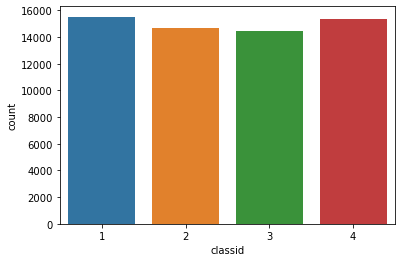

In [6]:
df=train_data[:60000]
sns.countplot(df.classid);

In [7]:
#Data Preprocessing

In [8]:
#Tokenising the data
def tokenization(text):
    lst=text.split()
    return lst
train_x=train_x.apply(tokenization)
test_x=test_x.apply(tokenization)

In [9]:
#convert all to lowercase
def lowercasing(lst):
    new_lst=[]
    for  i in  lst:
        i=i.lower()
        new_lst.append(i) 
    return new_lst
train_x=train_x.apply(lowercasing)
test_x=test_x.apply(lowercasing)

In [10]:
#removing punctuations
def remove_punctuations(lst):
    new_lst=[]
    for i in lst:
        for  j in  s.punctuation:
            i=i.replace(j,'')
        new_lst.append(i)
    return new_lst
train_x=train_x.apply(remove_punctuations) 
test_x=test_x.apply(remove_punctuations)

In [11]:
#removing numbers
def remove_numbers(lst):
    nodig_lst=[]
    new_lst=[]

    for i in  lst:
        for j in  s.digits:
            i=i.replace(j,'')
        nodig_lst.append(i)
    for i in  nodig_lst:
        if  i!='':
            new_lst.append(i)
    return new_lst
train_x=train_x.apply(remove_numbers)
test_x=test_x.apply(remove_numbers)

In [12]:
#removing stop words
def remove_stopwords(lst):
    stop=stopwords.words('english')
    new_lst=[]
    for i in lst:
        if i not in stop:
            new_lst.append(i)
    return new_lst

train_x=train_x.apply(remove_stopwords)
test_x=test_x.apply(remove_stopwords)  

In [13]:
#lemmatization
lemmatizer=nltk.stem.WordNetLemmatizer()
def lemmatzation(lst):
    new_lst=[]
    for i in lst:
        i=lemmatizer.lemmatize(i)
        new_lst.append(i)
    return new_lst
train_x=train_x.apply(lemmatzation)
test_x=test_x.apply(lemmatzation)

In [14]:
train_x=train_x.apply(lambda x: ''.join(i+' ' for i in x))
test_x=test_x.apply(lambda x: ''.join(i+' '  for i in x))

In [15]:
#feature extraction
tfidf=TfidfVectorizer(max_features=10000,min_df=6)
train_1=tfidf.fit_transform(train_x)
test_1=tfidf.transform(test_x)
print("No. of features extracted")
print(len(tfidf.get_feature_names()))
print(tfidf.get_feature_names()[:50])

train_arr=train_1.toarray()
test_arr=test_1.toarray()

No. of features extracted
10000
['aa', 'aapl', 'aaron', 'ab', 'ababa', 'abandon', 'abandoned', 'abandoning', 'abarrel', 'abbas', 'abbey', 'abc', 'abducted', 'abduction', 'abductor', 'abdul', 'abdullah', 'ability', 'ablaze', 'able', 'aboard', 'abortion', 'abroad', 'abrupt', 'abruptly', 'absa', 'absence', 'abu', 'abuja', 'abuse', 'abused', 'abusing', 'ac', 'academic', 'academy', 'acc', 'accelerate', 'accelerated', 'accelerating', 'accept', 'acceptance', 'accepted', 'accepting', 'accepts', 'access', 'accessible', 'accessing', 'accession', 'accessory', 'accident']


In [16]:
#Multinomial Naive Bayes

In [17]:
NB_MN=MultinomialNB()
NB_MN.fit(train_arr,train_y)
pred=NB_MN.predict(test_arr)

In [18]:
def eval_model(y,y_pred):
    print("F1 score of the model")
    print(f1_score(y,y_pred,average='micro'))
    print("Accuracy of the model")
    print(accuracy_score(y,y_pred))
    print("Accuracy of the model in percentage")
    print(round(accuracy_score(y,y_pred)*100,3),"%")

In [19]:
def confusion_mat(color):
    cof=confusion_matrix(test_y, pred)
    cof=pd.DataFrame(cof, index=[i for i in range(1,5)], columns=[i for i in range(1,5)])
    sns.set(font_scale=1.5)
    plt.figure(figsize=(8,8));

    sns.heatmap(cof, cmap=color,linewidths=1, annot=True,square=True, fmt='d', cbar=False,xticklabels=['World','Sports','Business','Science'],yticklabels=['World','Sports','Business','Science']);
    plt.xlabel("Predicted Classes");
    plt.ylabel("Actual Classes");

In [20]:
eval_model(test_y,pred)
    
a=round(accuracy_score(test_y,pred)*100,3)

F1 score of the model
0.8814473684210526
Accuracy of the model
0.8814473684210526
Accuracy of the model in percentage
88.145 %


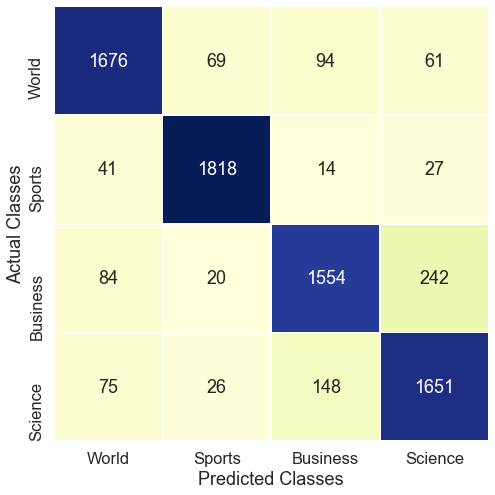

In [21]:
confusion_mat('YlGnBu')

In [22]:
DT=DecisionTreeClassifier()
DT.fit(train_arr,train_y)
pred=DT.predict(test_arr)

In [23]:
eval_model(test_y,pred)
    
b=round(accuracy_score(test_y,pred)*100,3)

F1 score of the model
0.7731578947368422
Accuracy of the model
0.7731578947368422
Accuracy of the model in percentage
77.316 %


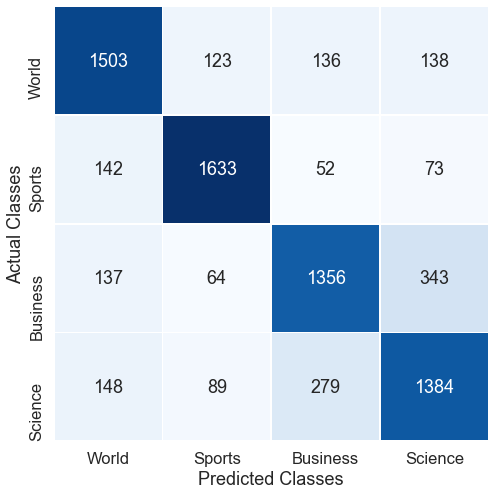

In [24]:
confusion_mat('Blues')

In [22]:
NB=GaussianNB()
NB.fit(train_arr,train_y)
pred=NB.predict(test_arr)

In [23]:
eval_model(test_y,pred)
    
c=round(accuracy_score(test_y,pred)*100,3)

F1 score of the model
0.7963157894736842
Accuracy of the model
0.7963157894736842
Accuracy of the model in percentage
79.632 %


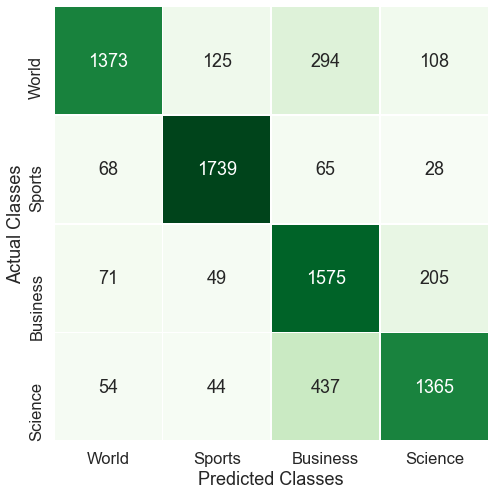

In [24]:
confusion_mat('Greens')

In [27]:
LR=LogisticRegression()
LR.fit(train_arr,train_y)
pred=LR.predict(test_arr)

C:\Users\Anukriti\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
eval_model(test_y,pred)
    
d=round(accuracy_score(test_y,pred)*100,3)

F1 score of the model
0.8906578947368421
Accuracy of the model
0.8906578947368421
Accuracy of the model in percentage
89.066 %


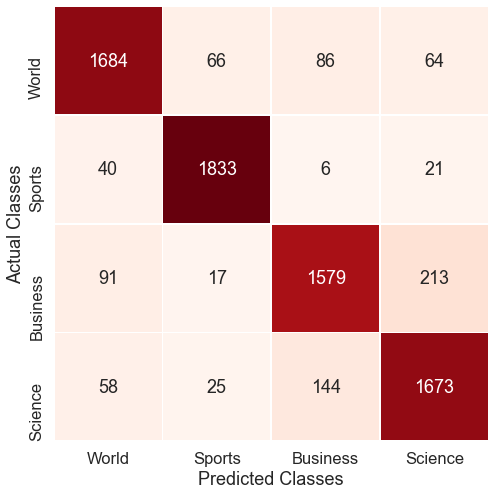

In [29]:
confusion_mat('Reds')